# Transforming vectors

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import operator as op
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from IPython.display import display, Latex

from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

import matplotlib as mpl
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=100)


mm = 1 / 25.4
columnwidth = 86.44 * mm
textwidth = 179 * mm

<Figure size 1000x1000 with 0 Axes>

## Vectors and matrices

A vector is an ordered list of numbers. In physics it is often underscored that vectors have a direction and that sets them apart from scalar quantities i.e. just numbers, however, the key difference lies in how vectors transform. Abstractly speaking vectors have a well-defined meaning as mathematical objects but we will not indulge in that perspective currently. Let's consider a vector in 2 dimensions i.e. a flatlander, one can describe the it's position by means of two coordinates:
$$\textbf{v} = \begin{pmatrix} 
x \\
y \end{pmatrix}$$
Any transformation on a vector must depend on it's intial coordinates, that is let us suppose we perform a transformation $A$ on a vector:
$$A\textbf{v} = \textbf{v}_{\textbf{new}}$$
Then the coordinates of the transformed vector must take the form:
$$x_{new} = a.x + b.y$$
$$y_{new} = c.x + d.y$$
This motivates the need for matrices, objects that can represent the transformation as follows:
$$\textbf{A} = \begin{pmatrix} 
a & b \\
c & d 
\end{pmatrix}$$
Let us consider the example of a reflection about the $y$ axis in flatland for a vector,
$$\textbf{v} = \begin{pmatrix} 
1 \\
1 \end{pmatrix}$$
We know that such a reflection must flip the $y$ coordinate, that is the transformed vector is,
$$\textbf{v} = \begin{pmatrix} 
1 \\
-1 \end{pmatrix}$$
Thus the matrix representing the transformation takes the form:
$$\textbf{A} = \begin{pmatrix} 
1 & 0 \\
0 & -1 
\end{pmatrix}$$
Let's visualize this!

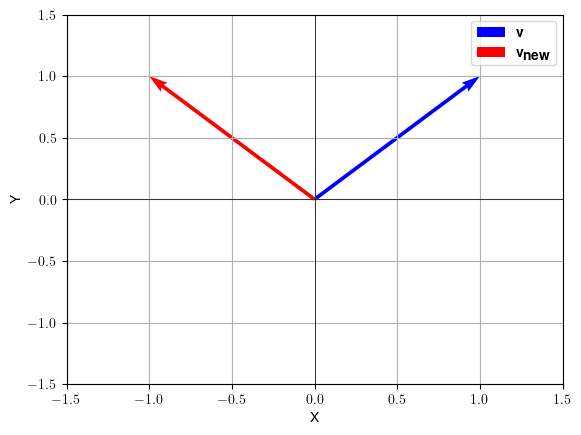

In [12]:
v = np.array([1, 1])
v_reflected = np.array([-1, 1])
fig, ax = plt.subplots()

ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='$\\textbf{v}$')
ax.quiver(0, 0, v_reflected[0], v_reflected[1], angles='xy', scale_units='xy', scale=1, color='r', label='$\\textbf{v}_{\\textbf{new}}$')

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

## 3 dimensions

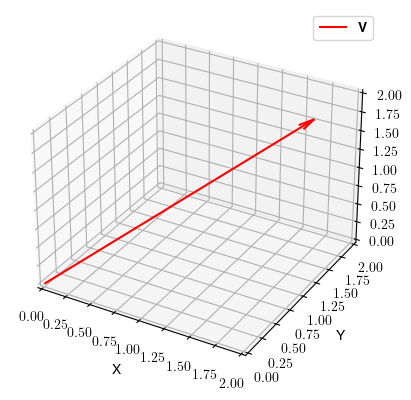

In [44]:
vector = np.array([1, 1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.array([0, 0, 0])

ax.quiver(*origin, *vector, color='r', label='\\textbf{V}', length=np.linalg.norm(vector), arrow_length_ratio=0.05)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])
ax.legend()

## Matrix Multiplication

A matrix is way of representating transformations to a vector. A matrix can be thought of as an object which is multidimensional, whose entries are simply numbers. Matrices act on vectors by means of "matrix multiplication", an operation in which entries of the matrix are multiplied and added according to the components of the vector.

<figure>
<img src="Stubs/matrix_mult.jpg">
<figcaption>Visualization of matrix multiplication in 3 dimensions.</figcaption>
</figure>

Let us work through a concrete example now. Let's take the following vector:
$$\textbf{v} = \begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} 	 $$
and rotate it 90 degrees clockwise about the x-axis by means of acting on it via the following matrix:
$$\textbf{R}_x\left(\frac{\pi}{2}\right) = \begin{pmatrix}
1 & 0 & 0\\
0 & 0 & -1 \\
0 & 1 & 0
\end{pmatrix} $$
This takes the form:
$$\textbf{R}_x\left(\frac{\pi}{2}\right) \textbf{v} = \begin{pmatrix}
1 & 0 & 0\\
0 & 0 & -1 \\
0 & 1 & 0
\end{pmatrix} \begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} = \begin{pmatrix}
1 \\
-1 \\
1
\end{pmatrix} = \textbf{v}_{\textbf{new}}  $$

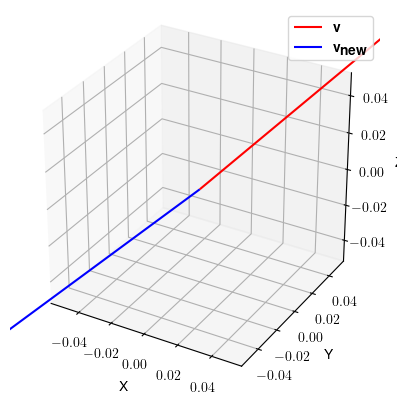

In [13]:
vector = np.array([1, 1, 1])
vector_ = np.array([1, -1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origin = np.array([0, 0, 0])

ax.quiver(*origin, *vector, color='r', label='$\\textbf{v}$', length=np.linalg.norm(vector), arrow_length_ratio=0.05)
ax.quiver(*origin, *vector_, color='b', label='$\\textbf{v}_{\\textbf{new}}$', length=np.linalg.norm(vector), arrow_length_ratio=0.05)
ax.set_box_aspect([1,1,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

## Translations

Translations are transfromations that shift/move particular coordinates of a vector, one think of this to be analogous walking/jumping. It is important to note that here, translations simply act via addition of vectors. The general transformation matrix takes the following form:
$$T(t_x,t_y,t_z) = 
\left(\begin{array}{l}
t_x \\
t_y \\
t_z 
\end{array}\right)
$$
Let us now try to move our vector,
$$\textbf{v} = \begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} 	 $$
two steps in the $x$ direction and $1$ step in the y direction, given by the following matrix
$$T(2,1,0) = 
\left(\begin{array}{llll}
2 \\
1 \\
0 
\end{array}\right)
$$
resulting in the transformed vector,
$$T(2,1,0) + \textbf{v}  = 
\left(\begin{array}{llll}
2 \\
1 \\
0 
\end{array}\right) + \begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} =	\begin{pmatrix}
3 \\
2 \\
1
\end{pmatrix} = \textbf{v}_{\textbf{new}}
$$
Let plot this!

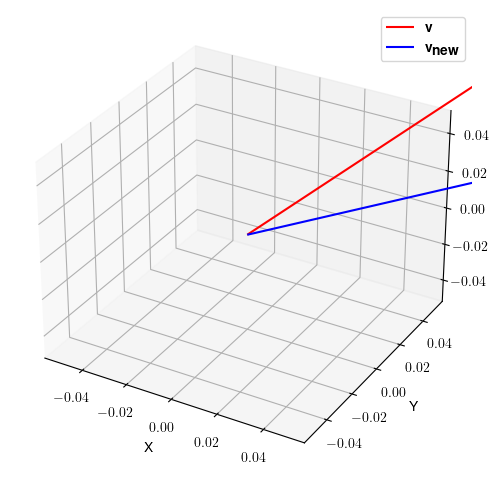

In [41]:
vector = np.array([1, 1, 1])
origin = np.array([0, 0, 0])
rotation_matrix = np.array([2, 1, 0])


rotated_vector = rotation_matrix + vector

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(*origin,*vector, color='r', label='$\\textbf{v}$')
ax.quiver(*origin,*rotated_vector, color='b', label='$\\textbf{v}_{\\textbf{new}}$')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

## Rotations

Rotation matrices act on vectors and rotate them by angle $\theta$ about an axis. They take the form,
$$
\begin{aligned}
& R_x(\theta)=\left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & \cos \theta & -\sin \theta \\
0 & \sin \theta & \cos \theta
\end{array}\right] \\
& R_y(\theta)=\left[\begin{array}{ccc}
\cos \theta & 0 & \sin \theta \\
0 & 1 & 0 \\
-\sin \theta & 0 & \cos \theta
\end{array}\right] \\
& R_z(\theta)=\left[\begin{array}{ccc}
\cos \theta & -\sin \theta & 0 \\
\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{array}\right]
\end{aligned}
$$
A generic rotation can be written as the product of these matrices:
$$
R(\alpha, \beta, \gamma)=R_z(\alpha) R_y(\beta) R_x(\gamma)
$$

Let us make this more concrete by considering a 180 degree anti-clockwise rotation of the vector,
$$\textbf{v} = \begin{pmatrix}
1 \\
-1 \\
1
\end{pmatrix}$$
about the y-axis. This can be written as the following matrix product:
$$R_y(-\pi) \textbf{v} = \begin{pmatrix}
-1 & 0 & 0 \\
0 & 1 & 0\\
0 & 0 & -1
\end{pmatrix} \begin{pmatrix}
1 \\
-1 \\
1
\end{pmatrix} = \begin{pmatrix}
-1 \\
-1 \\
-1
\end{pmatrix} = \textbf{v}_{\textbf{new}}$$

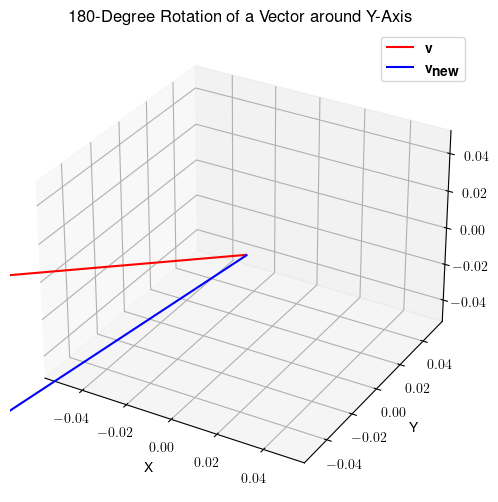

In [14]:
vector = np.array([1, -1, 1])
rotation_matrix = np.array([
    [-1, 0, 0],
    [0, 1, 0],
    [0, 0, -1]
])

rotated_vector = rotation_matrix @ vector

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

origin = np.array([0, 0, 0])

ax.quiver(*origin,*vector, color='r', label='$\\textbf{v}$')
ax.quiver(*origin,*rotated_vector, color='b', label='$\\textbf{v}_{\\textbf{new}}$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('180-Degree Rotation of a Vector around Y-Axis')


ax.legend()
plt.show()

There are a few interesting things about the rotation matrices:
- They preserve lengths: $det(R(\alpha, \beta, \gamma)) = 1$
For instance, the length of the tranformed vector is equal to the length of the original vector

In [4]:
np.linalg.norm(vector) == np.linalg.norm(rotated_vector)

True

- They leave perpendicular vectors perpendicular: $
R(\alpha, \beta, \gamma)^{\top} R(\alpha, \beta, \gamma)=R(\alpha, \beta, \gamma) R(\alpha, \beta, \gamma)^{\top}=I
$ 

For instance let us consider the following vectors
$$\textbf{v} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$$
$$\textbf{w} = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}$$
and perform a $90$ degrees clockwise about the $x$-axis by means of acting on it via the following matrix:
$$\textbf{R}_x\left(\frac{\pi}{2}\right) = \begin{pmatrix}
1 & 0 & 0\\
0 & 0 & -1 \\
0 & 1 & 0
\end{pmatrix} $$
$$$$
Let us now visualize the vectors before and after the transformation:

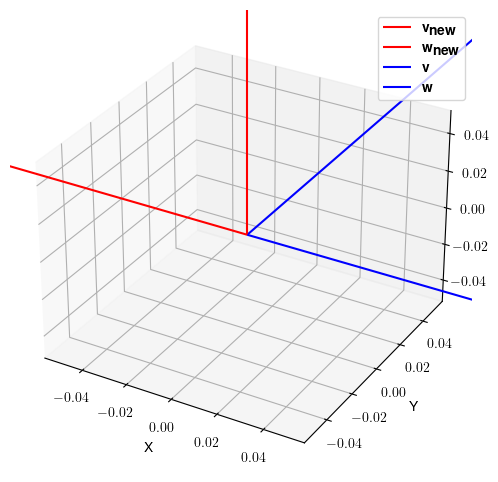

In [5]:
v = np.array([1, 0, 0])
w = np.array([0, 1, 0])
rotation_matrix = np.array([
    [-1, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])
origin = np.array([0, 0, 0])

rotated_v = rotation_matrix @ v
rotated_w = rotation_matrix @ w

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(*origin,*rotated_v, color='r', label='$\\textbf{v}_{\\textbf{new}}$')
ax.quiver(*origin,*rotated_w, color='r', label='$\\textbf{w}_{\\textbf{new}}$')
ax.quiver(*origin,*v, color='b', label='$\\textbf{v}$')
ax.quiver(*origin,*w, color='b', label='$\\textbf{w}$')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

They still remain perpendicular!


- They don't commute: $
R(\alpha, \beta, \gamma) R(\nu, \mu, \chi) \neq R(\nu, \mu, \chi) R(\alpha, \beta, \gamma)
$ 
Let's perform after to , we find that this does not result in the same transformed vector!

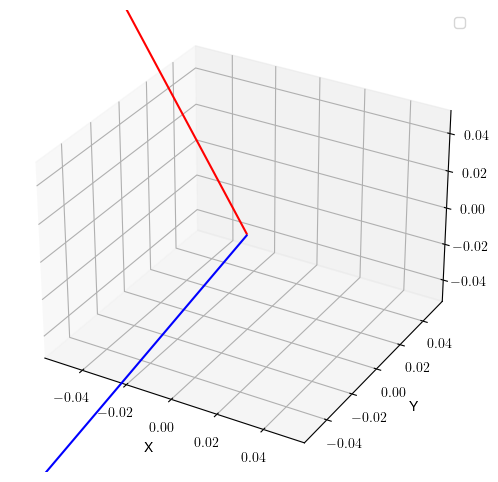

In [16]:
vector = np.array([1, 1, 1])
rotation_matrix = np.array([
    [-1, 0, 0],
    [0, 1, 0],
    [0, 0, -1]
])
rotation_matrix_1 = np.array([
    [1, 0, 0],
    [0, 0, -1],
    [0, 1, 1]
])
origin = np.array([0, 0, 0])

rotated_1 =rotation_matrix_1 @ rotation_matrix @ vector
rotated_2 =rotation_matrix @ rotation_matrix_1 @ vector

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(*origin,*rotated_1, color='r')
ax.quiver(*origin,*rotated_2, color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

These pecularities also have a very interesting mathematical significance which we will explore in week 4!

## Reflections

Reflection transformations in 3 dimensions can be written down as the following matrices:
$$ P_{zy} = 
\left(\begin{array}{ccc}
-1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right)
$$
$$ P_{xz} = 
\left(\begin{array}{ccc}
1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 1
\end{array}\right)
$$
$$ P_{xy} = 
\left(\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & -1
\end{array}\right)
$$
the lower-indices indicate which plane is used for reflection. Let make this more concrete by consider a reflection of the vector,
$$\textbf{v} = \begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} 	 $$
about the $x-y$ plane,
$$ P_{xy} \textbf{v} = \left(\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & -1
\end{array}\right) \begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} = \begin{pmatrix}
1 \\
1 \\
-1
\end{pmatrix} =  \textbf{v}_{\textbf{new}}$$
Let's visualize this!

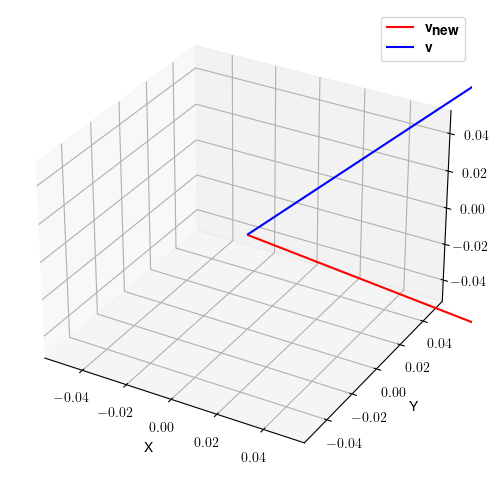

In [17]:
v = np.array([1, 1, 1])
rotation_matrix = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, -1]
])
origin = np.array([0, 0, 0])

rotated_v = rotation_matrix @ v

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(*origin,*rotated_v, color='r', label='$\\textbf{v}_{\\textbf{new}}$')
ax.quiver(*origin,*v, color='b', label='$\\textbf{v}$')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

## Scaling transformations

Scaling transformations are the set of transformations that do not preserve the length of a vector. The matrix representation of a scaling transformation in 3 dimensions can be written as,
$$S(s_x,s_y,s_z) = \left(\begin{array}{cccc}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & s_z \\
\end{array}\right)$$
Let us consider the following scaling transformation:
$$S(s_x,s_y,s_z) = \left(\begin{array}{cccc}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 3 \\
\end{array}\right)$$
acting on the vector,

This gives the transformed vector,
$$S(s_x,s_y,s_z) = \left(\begin{array}{cccc}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & s_z \\
\end{array}\right)$$

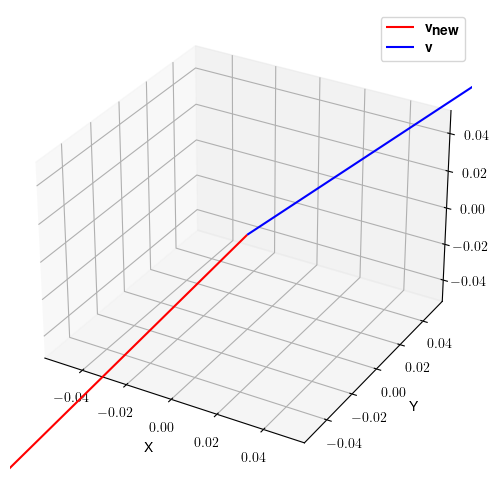

In [21]:
v = np.array([1, 1, 1])
rotation_matrix = np.array([
    [2, 0, 0],
    [0, -1, 0],
    [0, 0, 3]
])
origin = np.array([0, 0, 0])

rotated_v = rotation_matrix @ v

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(*origin,*rotated_v, color='r', label='$\\textbf{v}_{\\textbf{new}}$')
ax.quiver(*origin,*v, color='b', label='$\\textbf{v}$')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [22]:
np.linalg.norm(v) == np.linalg.norm(rotated_v)

False

## Identity

The identity transformation i.e. do nothing is also a symmetry!
$$ \mathbb{I} = 
\left(\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array}\right)$$
The action of the identity leaves any vector invariant, it makes no changes to the components.